In [2]:
import inspect
import os
import sys

# TODO: Remove this hackish way of loading parent's dir modules
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

In [3]:
from SoccerNet.Evaluation.ActionSpotting import evaluate as soccer_net_evaluate
from collections import namedtuple
from distutils.util import strtobool

from pathlib import Path
import json

from evaluation.report import MeanAvgPrecisionTable
from IPython.core.display import display


def load_zipped_result(zr):
    r = soccer_net_evaluate(SoccerNet_path='../data/soccernet',
                            Predictions_path=zr.fpath)
    r['method'] = zr.name
    return r

def load_cache_results(json_path):
    with open(json_path) as json_file:
        return json.load(json_file)
    
def calc_results(zipped_results, output_fpath, calculate_zipped_results=None):
    if calculate_zipped_results is None:
        calculate_zipped_results = strtobool(input("Calculate zipped results?"))
        
    if calculate_zipped_results:   
        results = [load_zipped_result(zr) for zr in zipped_results]
        with open(output_fpath, 'w') as outfile:
            json.dump(results, outfile)
    else:
        results = load_cache_results(output_fpath)
    return results

ZippedResults = namedtuple('ZippedResults', 'name fpath')

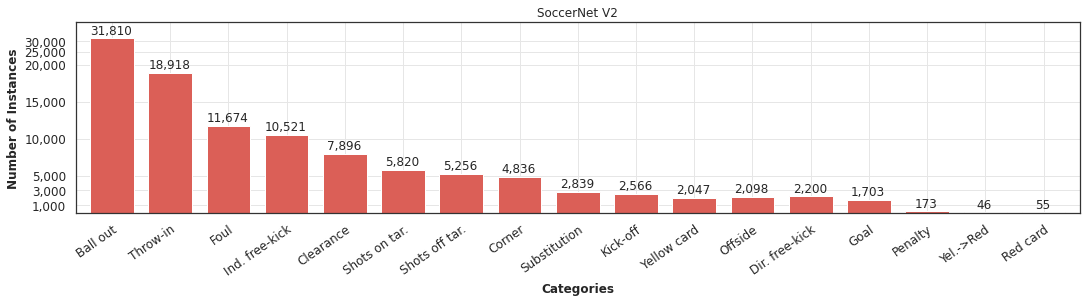

In [6]:
from IO.datasets import SoccerNetStats
from visualizations import plot_soccernet_histogram

soccernet = SoccerNetStats(Path('../data/soccernet/'))
fig, ax = plot_soccernet_histogram(soccernet, figsize=(18,3.5))
plt.savefig('dataset.png', dpi=300, bbox_inches='tight')

# Node Information

In [9]:
zipped_results = [ZippedResults('Position', '../weights/ablation/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:5/results_spotting_test.zip'),
                  ZippedResults('Position + Player Classification', '../weights/ablation/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:7/results_spotting_test.zip'),
                  ZippedResults('Position + Motion Vectors', '../weights/ablation/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:10/results_spotting_test.zip'),
                  ZippedResults('Everything', '../weights/ablation/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12/results_spotting_test.zip'),]

ablation_results = calc_results(zipped_results, '../results/node_ablation.json')

Calculate zipped results? yes


100%|██████████| 12/12 [00:18<00:00,  1.57s/it]


In [10]:
map_table = MeanAvgPrecisionTable(ablation_results)
display(map_table)

,SoccerNet-v2,visible,not-shown,Ball out,Throw-in,Foul,Ind. free-kick,Clearance,Shots on tar.,Shots off tar.,Corner,Substitution,Kick-off,Yellow card,Offside,Dir. free-kick,Goal,Penalty,Yel.->Red,Red card
Position,39.74,44.28,30.83,63.69,62.89,52.27,41.00,56.58,28.47,33.43,75.04,31.32,50.81,25.36,8.53,51.20,27.57,65.34,1.49,0.65
Position + Player Classification,41.57,45.80,30.95,64.32,62.96,53.45,43.36,57.54,32.59,35.81,75.15,39.33,52.64,25.58,11.34,53.21,31.73,66.00,1.22,0.39
Position + Motion Vectors,41.08,46.66,30.75,64.33,62.49,54.97,42.78,57.75,32.59,28.67,76.25,37.83,49.06,28.51,17.02,50.78,31.38,60.32,1.68,1.94
Everything,43.29,49.16,31.89,65.25,63.15,56.26,44.93,57.52,32.63,35.79,76.05,43.11,58.96,26.51,16.31,52.36,35.22,61.52,6.59,3.84


# Distance

In [7]:
zipped_results = [ZippedResults('05m', '../weights/distances/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12 distance:05/results_spotting_test.zip'),
                  ZippedResults('10m', '../weights/distances/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12 distance:10/results_spotting_test.zip'),
                  ZippedResults('15m', '../weights/distances/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12 distance:15/results_spotting_test.zip'),
                  ZippedResults('20m', '../weights/distances/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12 distance:20/results_spotting_test.zip'),
                  ZippedResults('25m', '../weights/distances/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12 distance:25/results_spotting_test.zip')
                 ]

distance_results = calc_results(zipped_results, '../results/distances.json')

Calculate zipped results? yes


100%|██████████| 12/12 [00:18<00:00,  1.58s/it]


In [8]:
map_table = MeanAvgPrecisionTable(distance_results)
display(map_table)

,SoccerNet-v2,visible,not-shown,Ball out,Throw-in,Foul,Ind. free-kick,Clearance,Shots on tar.,Shots off tar.,Corner,Substitution,Kick-off,Yellow card,Offside,Dir. free-kick,Goal,Penalty,Yel.->Red,Red card
05m,43.29,49.16,31.89,65.25,63.15,56.26,44.93,57.52,32.63,35.79,76.05,43.11,58.96,26.51,16.31,52.36,35.22,61.52,6.59,3.84
10m,43.20,49.04,31.64,64.73,63.59,57.14,44.59,58.70,34.78,32.38,77.09,43.06,55.69,30.92,17.56,54.60,34.13,60.75,3.46,1.30
15m,42.35,47.46,31.01,64.32,63.34,55.76,44.40,57.23,32.56,29.56,76.01,41.02,58.85,25.84,17.40,51.66,34.96,64.39,1.51,1.15
20m,42.17,47.90,31.22,64.80,63.61,57.14,44.22,58.51,32.05,33.63,76.72,40.96,52.36,30.36,12.32,52.91,30.10,60.07,6.21,0.94
25m,43.00,47.88,31.78,65.18,64.33,56.39,45.19,58.78,30.18,34.71,76.55,42.89,58.75,27.16,11.67,54.63,36.08,65.98,2.05,0.46


# Backbone

In [11]:
zipped_results = [ZippedResults('ResGCN-14', '../weights/backbones/NetVLAD++_graph:resGCN-14 bboxes:pointrend calibrations: ccbv feature_size:12/results_spotting_test.zip'),
                  ZippedResults('GCN', '../weights/backbones/NetVLAD++_graph:GCN bboxes:pointrend calibrations: ccbv feature_size:12/results_spotting_test.zip'),
                  ZippedResults('EdgeGCN', '../weights/backbones/NetVLAD++_graph:EdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12/results_spotting_test.zip'),
                  ZippedResults('DynamicEdgeGCN', '../weights/backbones/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12/results_spotting_test.zip')]

backbone_results = calc_results(zipped_results, '../results/backbones.json')

Calculate zipped results? yes


100%|██████████| 12/12 [00:19<00:00,  1.62s/it]


In [4]:
map_table = MeanAvgPrecisionTable(backbone_results)
display(map_table)

,SoccerNet-v2,visible,not-shown,Ball out,Throw-in,Foul,Ind. free-kick,Clearance,Shots on tar.,Shots off tar.,Corner,Substitution,Kick-off,Yellow card,Offside,Dir. free-kick,Goal,Penalty,Yel.->Red,Red card
ResGCN-14,42.43,47.37,33.21,65.42,65.15,57.44,47.08,59.05,35.88,37.40,76.92,36.33,57.02,29.93,20.44,39.69,31.74,56.53,2.63,2.73
GCN,40.77,45.73,30.58,63.74,63.55,54.52,42.51,57.63,32.81,35.80,74.66,41.42,46.73,31.14,18.48,45.29,28.50,53.99,2.26,0.10
EdgeGCN,36.99,42.09,29.29,60.80,60.62,54.03,38.03,49.36,30.29,28.59,72.67,23.51,44.74,24.17,7.89,47.48,35.48,45.09,2.09,4.01
DynamicEdgeGCN,43.29,49.16,31.89,65.25,63.15,56.26,44.93,57.52,32.63,35.79,76.05,43.11,58.96,26.51,16.31,52.36,35.22,61.52,6.59,3.84


# Multimodal

In [13]:
zipped_results = [ZippedResults('Audio', '../weights/multimodal/NetVLAD++_audio/results_spotting_test.zip'),                  
                  ZippedResults('Graph', '../weights/multimodal/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12/results_spotting_test.zip'),
                  ZippedResults('RGB', '../weights/multimodal/NetVLAD++_rgb/results_spotting_test.zip'),                  
                  ZippedResults('Audio+Graph', '../weights/multimodal/NetVLAD++_audio_graph/results_spotting_test.zip'),                  
                  ZippedResults('RGB+Graph', '../weights/multimodal/NetVLAD++_rgb_graph/results_spotting_test.zip'),                  
                  ZippedResults('RGB+Audio', '../weights/multimodal/NetVLAD++_rgb_audio/results_spotting_test.zip'),                  
                  ZippedResults('RGB+Audio+Graph', '../weights/multimodal/NetVLAD++_rgb_audio_graph/results_spotting_test.zip'),
                 ]

multimodal_results = calc_results(zipped_results, '../results/multimodal.json')

Calculate zipped results? yes


100%|██████████| 12/12 [00:25<00:00,  2.11s/it]


In [14]:
map_table = MeanAvgPrecisionTable(multimodal_results)
display(map_table)

,SoccerNet-v2,visible,not-shown,Ball out,Throw-in,Foul,Ind. free-kick,Clearance,Shots on tar.,Shots off tar.,Corner,Substitution,Kick-off,Yellow card,Offside,Dir. free-kick,Goal,Penalty,Yel.->Red,Red card
Audio,31.59,37.33,19.44,46.04,28.65,54.63,32.05,17.07,43.04,27.60,27.54,46.01,22.17,21.18,19.52,27.94,76.56,39.22,7.08,0.69
Graph,43.29,49.16,31.89,65.25,63.15,56.26,44.93,57.52,32.63,35.79,76.05,43.11,58.96,26.51,16.31,52.36,35.22,61.52,6.59,3.84
RGB,51.28,56.17,34.62,65.82,62.46,62.71,41.91,56.48,37.73,37.19,77.38,69.34,60.74,51.41,39.39,56.09,70.76,72.42,0.83,9.13
Audio+Graph,49.23,53.45,38.14,68.57,57.53,68.33,43.83,54.97,48.10,38.98,77.78,57.12,56.95,33.25,23.02,58.23,79.05,69.84,0.03,1.30
RGB+Graph,51.53,56.47,35.65,73.04,65.85,62.81,45.72,60.62,40.37,40.08,82.81,65.29,62.99,50.15,25.29,59.19,55.63,73.30,11.60,1.22
RGB+Audio,53.55,61.32,35.08,70.95,64.92,67.49,41.80,53.05,48.51,34.22,80.92,67.08,58.75,50.48,26.05,58.53,77.10,76.40,18.24,15.86
RGB+Audio+Graph,57.83,63.92,42.78,76.06,67.19,73.65,48.15,63.43,50.01,45.03,85.14,71.29,66.60,50.29,34.93,62.45,83.21,85.34,13.91,6.40


# SOTA Comparison

In [15]:
zipped_results = [ZippedResults('Graph', '../weights/multimodal/NetVLAD++_graph:DynamicEdgeConvGCN bboxes:pointrend calibrations: ccbv feature_size:12/results_spotting_test.zip'),
                  ZippedResults('RGB+Audio+Graph', '../weights/multimodal/NetVLAD++_rgb_audio_graph/results_spotting_test.zip')]

sota_results = calc_results(zipped_results, '../results/sota.json')

Calculate zipped results? yes


100%|██████████| 12/12 [00:25<00:00,  2.09s/it]


In [16]:
other_results = calc_results(zipped_results, '../results/other_testset_results.json', False)

In [17]:
comparison_results = sota_results + other_results

In [18]:
map_table = MeanAvgPrecisionTable(comparison_results)
display(map_table)

,SoccerNet-v2,visible,not-shown,Ball out,Throw-in,Foul,Ind. free-kick,Clearance,Shots on tar.,Shots off tar.,Corner,Substitution,Kick-off,Yellow card,Offside,Dir. free-kick,Goal,Penalty,Yel.->Red,Red card
Graph,43.29,49.16,31.89,65.25,63.15,56.26,44.93,57.52,32.63,35.79,76.05,43.11,58.96,26.51,16.31,52.36,35.22,61.52,6.59,3.84
RGB+Audio+Graph,57.83,63.92,42.78,76.06,67.19,73.65,48.15,63.43,50.01,45.03,85.14,71.29,66.60,50.29,34.93,62.45,83.21,85.34,13.91,6.40
NetVLAD++,53.40,59.41,34.97,68.69,62.15,56.66,39.22,79.74,39.22,40.98,71.58,44.36,69.01,79.28,57.05,57.77,64.20,70.30,3.96,3.69
CameraCalibration,46.80,-100.00,-100.00,60.40,34.80,50.40,33.60,78.70,32.50,33.00,76.20,45.50,59.90,50.50,55.40,48.60,56.20,68.70,8.50,3.10
AImageLab-RMS,63.49,68.88,38.02,71.28,65.19,76.76,58.32,88.80,37.94,50.12,77.60,64.29,67.99,89.20,76.24,66.83,69.27,58.67,30.00,30.83
Baidu Research (Vidpress Sports),73.77,79.28,47.84,78.98,82.83,79.11,67.97,88.92,66.28,65.69,86.81,71.22,87.81,93.63,76.50,75.05,84.23,87.87,25.62,35.60
